<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [5]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [6]:
df = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')
df_ori = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [7]:
print(df.info())                    # Data types checking
print('')
print(df.nunique())                # Unique value counting 
print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB
None

street       981
city          39
zip           68
state          2
beds           8
baths          6
sq__ft       604
type           4
sale_date      5
price        605
latitude     969
longitude    967
dtype: int64



In [8]:
df['state'].replace({'AC':'CA'}, inplace=True)

In [9]:
df= df[df['beds'] != 0]

In [10]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [11]:
df.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [12]:
features = ['beds','baths','sq__ft']
X = df[features]
X.ndim

2

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [13]:
# y is the target variable --> PRICE IS OUR TARGET IN THIS LAB
y = df['price']
y.ndim

1

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [14]:
def in_n_scoef(x,y):
    x_bar = x.mean()
    y_bar = y.mean()
    sx    = x.std()
    sy    = y.std()
    rxy   = np.cov(x,y)
    ####################
    coef  = rxy*(sy/sx)
    inter = y_bar - (rxy*x_bar)
    print(f'The slope is: {coef}')
    print('')
    print(f'The intercept is: {inter}')

in_n_scoef(X['beds'],y)

The slope is: [[1.13314728e+05 7.85829600e+09]
 [7.85829600e+09 2.60283529e+15]]

The intercept is: [[ 2.39394393e+05  6.98351339e+04]
 [ 6.98351339e+04 -5.61622147e+10]]


### 6. Interpret the intercept and the slope.

Intercept: the point where x-axis and y-axis crosseseach other\
Slope: The change in y-axis over the change in x-axis, or the gradient of a line.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

#### Inference means using the model to learn about the data generation process.\
    We used linear regression in this case to observe how price of the real-estates are influenced by which factors.
    After fitting data on to model and interpret the role of the features on the prices we could,for example, study
    the relation ship of size of the room and prices 

#### Prediction means using the model to predict the outcomes for new data points.\
    Since we believe that there is a linear relationship between the prices and number of bedroom, number of bathroom, 
    and size of the room, we fit several linear models on the training data and finally we could use the selected model 
    to predict the prices.

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [15]:
X['sq__ft'][0], y[0]

(836, 59222)

In [16]:
#y_pred = y-intercept + slope(x)
y_pred = -5.63281585e+10 + (1.81918749e+05*836)

#residuals = y - y_pred
59222 - y_pred

# RUBBISH

56176133647.836

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [17]:
df_dum = pd.get_dummies(df_ori['type'])

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [18]:
df_dum.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [19]:
# Check point import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
# Create dummy columns for State, Type, and City
df2 = pd.get_dummies(df,columns=['type','city'])

In [21]:
# Drop unwanted columns
df_fin = df2.drop(['price','state','street','zip','sale_date','latitude','longitude'], axis=1, inplace=False)

In [22]:
df_fin.head()

,beds,baths,sq__ft,type_Condo,type_Multi-Family,type_Residential,city_ANTELOPE,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,...,city_RANCHO CORDOVA,city_RANCHO MURIETA,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON
0,2,1,836,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,1,1167,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1,796,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,852,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,1,797,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
X = df_fin[[col for col in df_fin]]
y = df['price']
print(X.shape)
print(y.shape)

(877, 43)
(877,)


In [24]:
# Instantiate
lr = LinearRegression()
# Fit the model
lr.fit(X,y)
# Check out coef.
lr.coef_
# Check out intercept
lr.intercept_

65084.752532664104

In [25]:
y_preds = lr.predict(X)

In [26]:
df_fin['y_preds'] = y_preds 

In [27]:
df_fin['true_price'] = df['price']

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

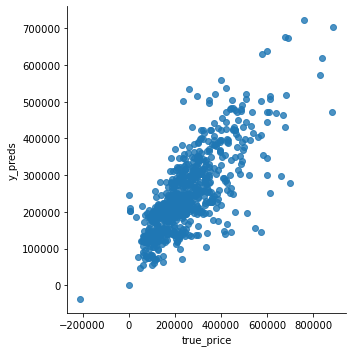

In [28]:
sns.lmplot(x='true_price', y='y_preds', data=df_fin, ci=False, fit_reg=False);

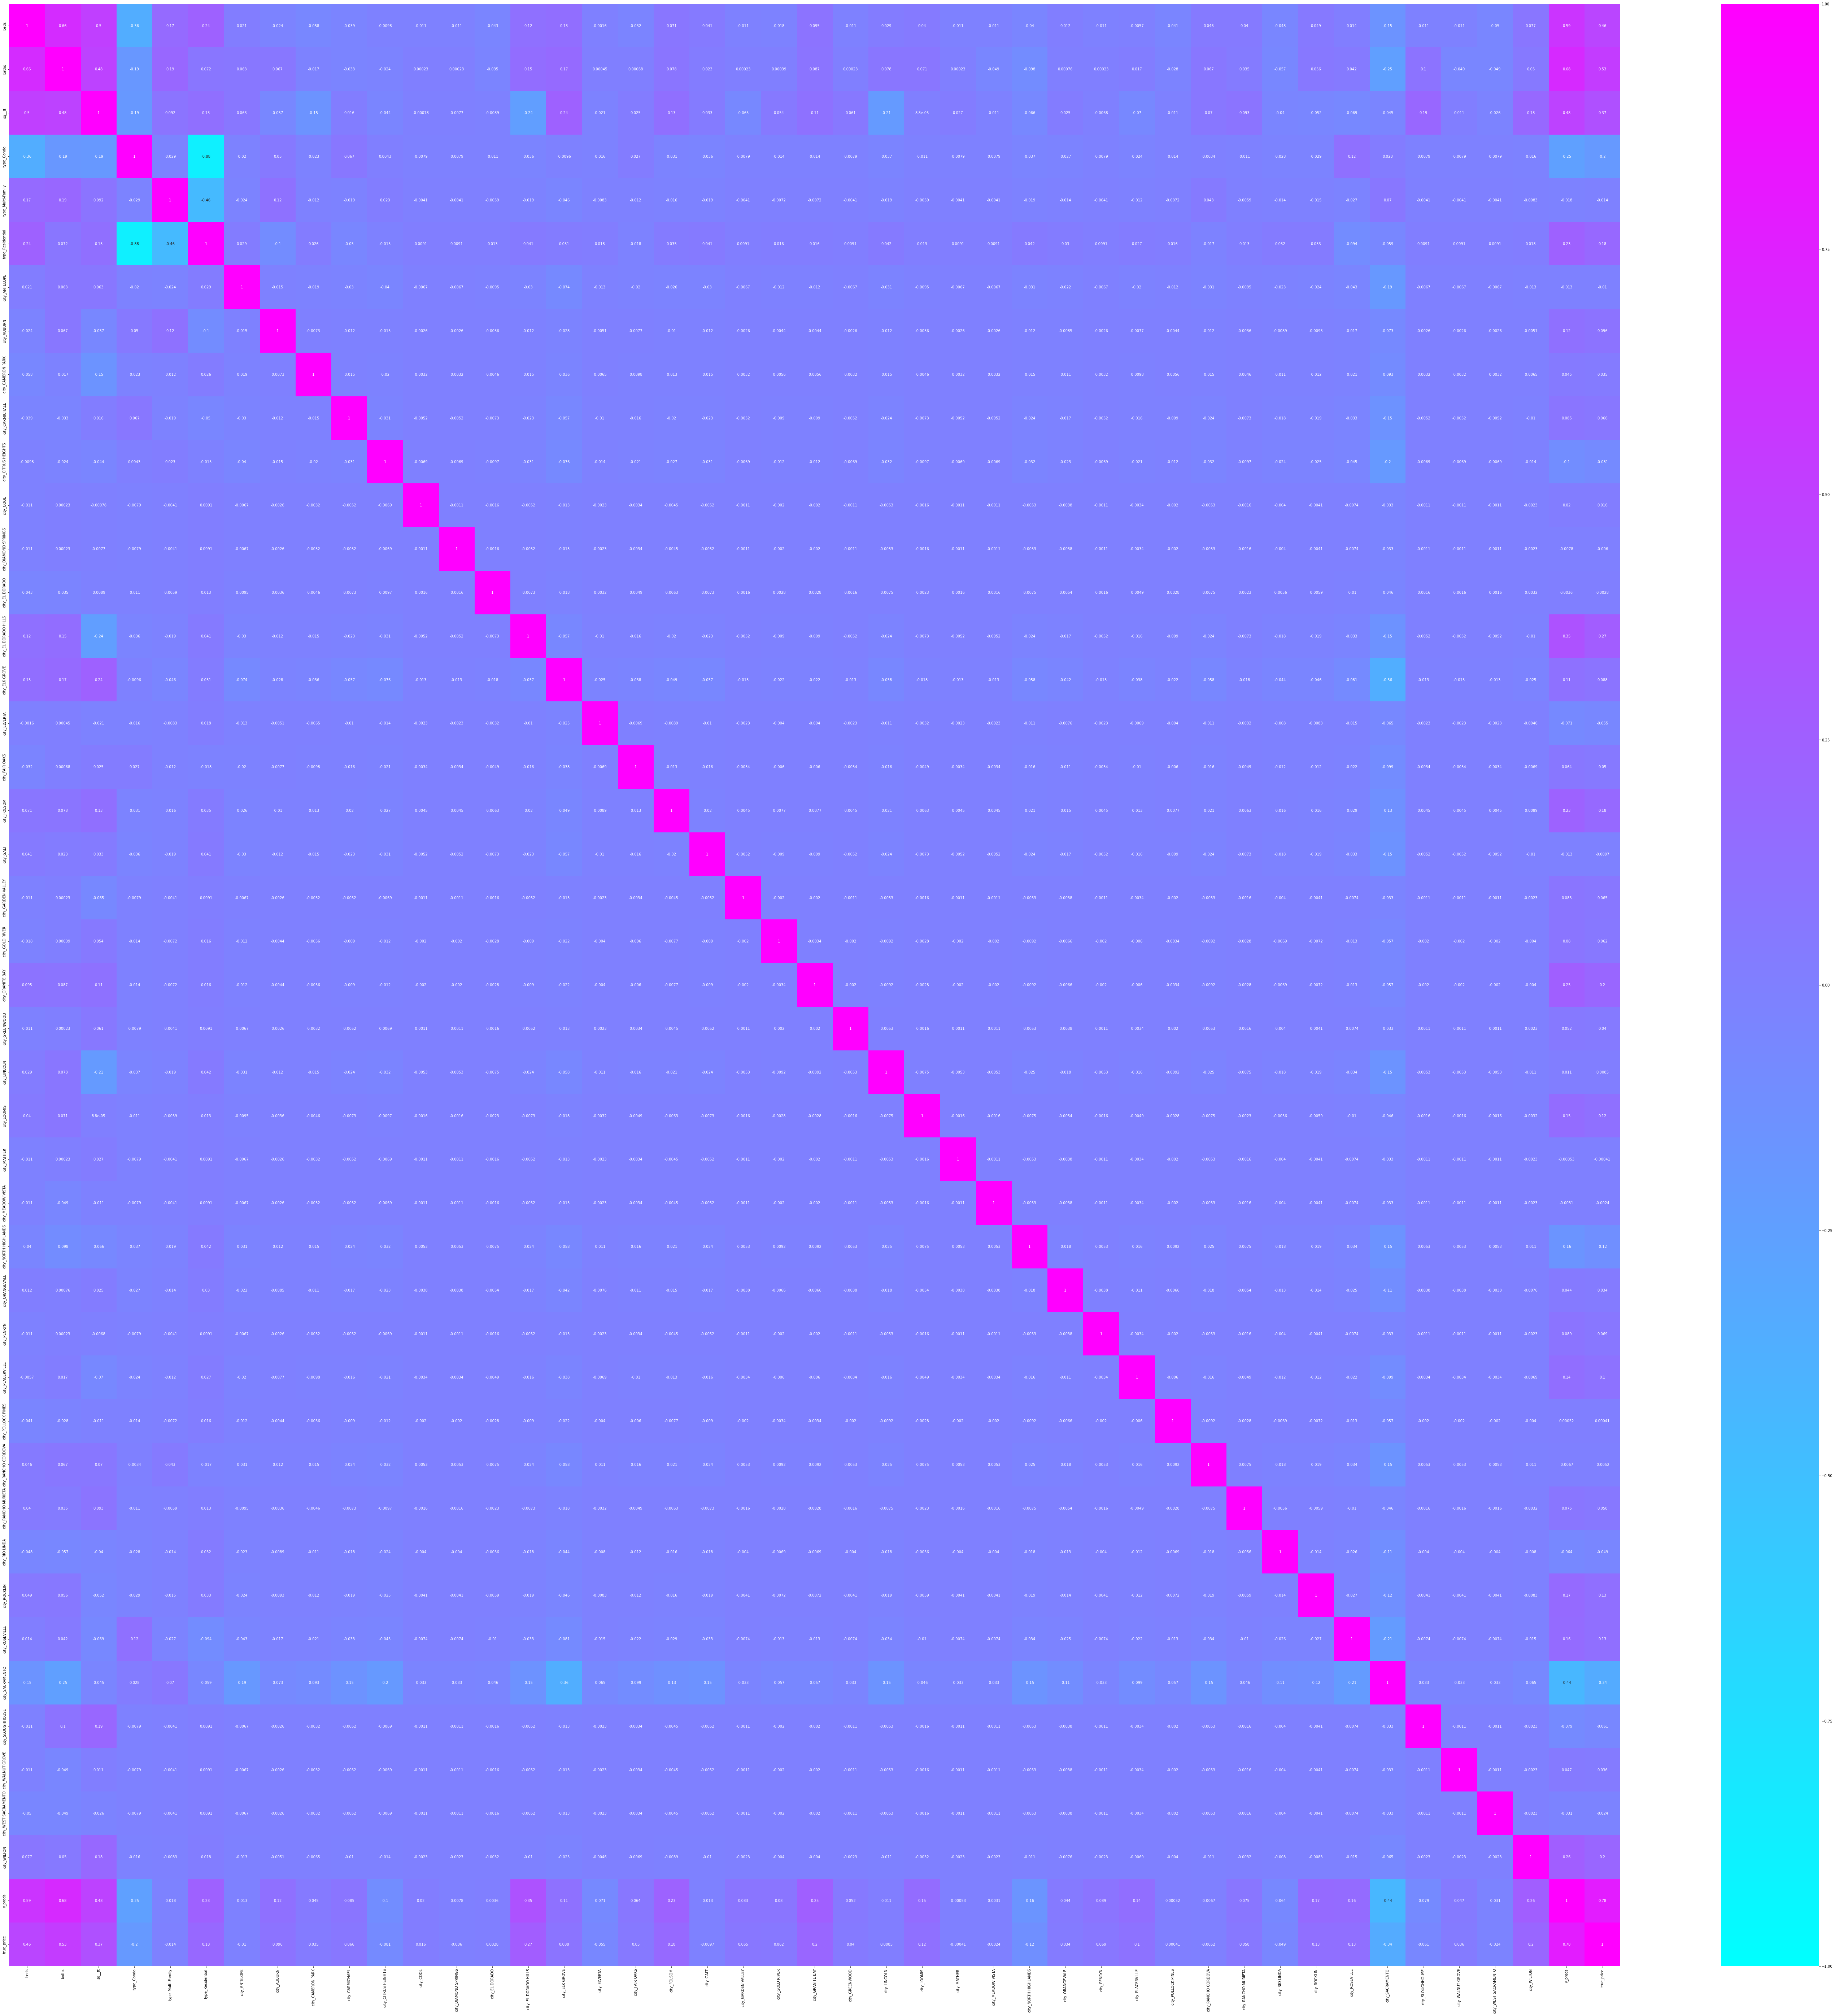

In [29]:
plt.figure(figsize=(100,100))
sns.heatmap(df_fin.corr(), cmap='cool', vmax=1, vmin=-1, annot=True);

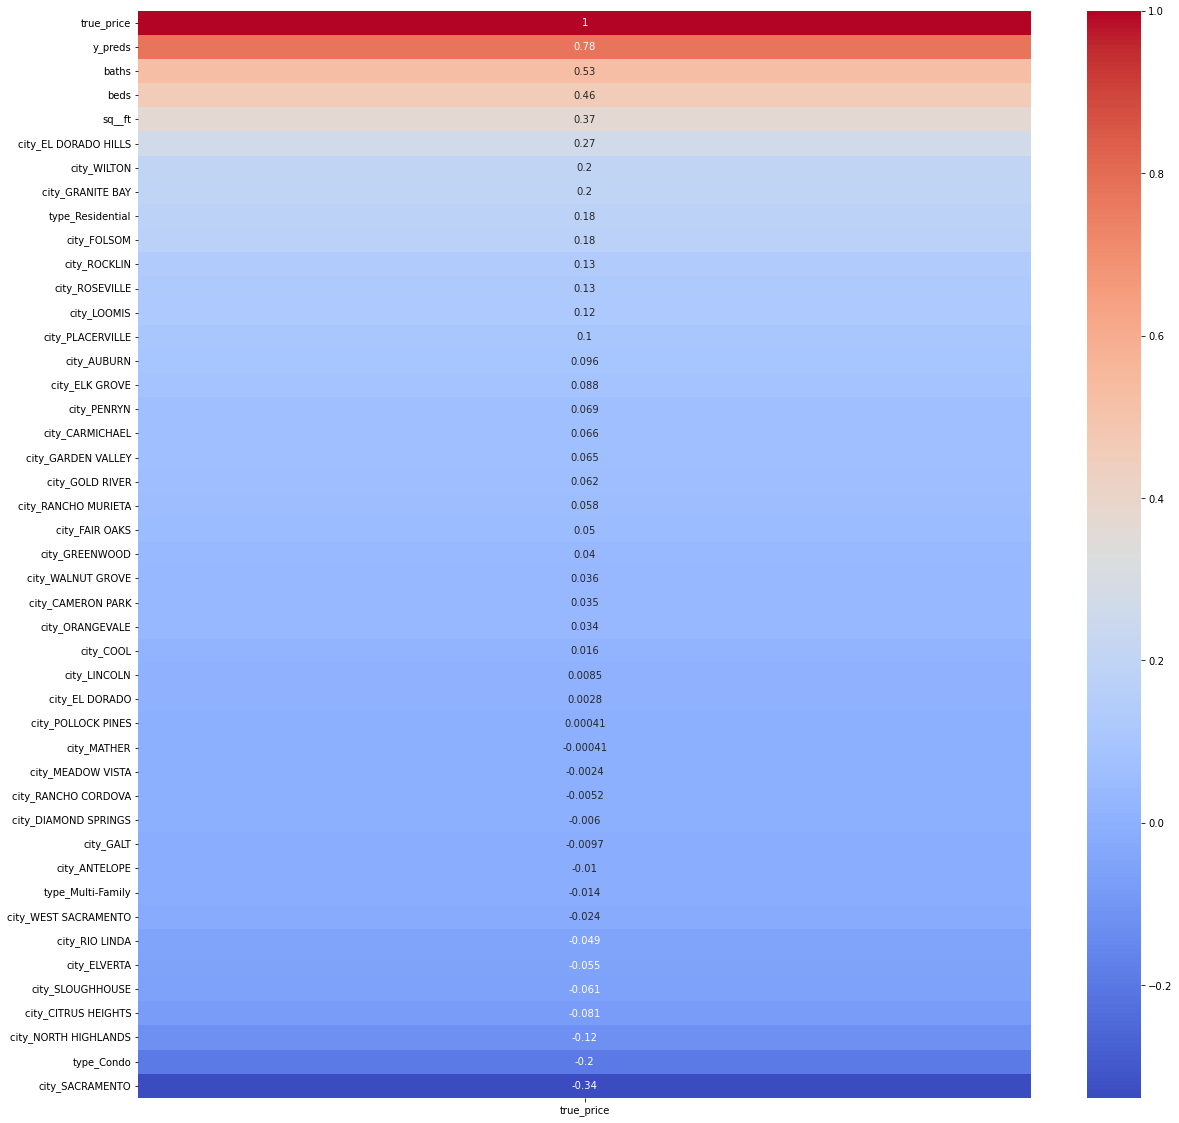

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df_fin.corr()[['true_price']].sort_values(by='true_price', ascending=False), cmap='coolwarm', annot=True);

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. Y-predictions (predicted sale prices) and True-Y (real sale prices) have detectable slope, but not really great for prediction 
2. Number of bathroom, number of bedroom, and size(sq_ft) are related to price more than other features 
3. Real-estates in Shingle Springs are all Unknown type (corr = 1 with Unknown type) --> Dropped
4. Eldorado Hills might be, might be, the most expensive area (corr = 0.29 to price)
5. Other features other than no. of bathroom, no. of bedroom, and size don't really matters, eventhough\
   these three features don't have that high correlation to sale prices.

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

In [31]:
# Set X and y
X = df[['beds','baths','sq__ft']]
y = df['price']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=69)
# Instantiate
lr = LinearRegression()
lr.fit(X_train,y_train)
# Train score
print(f'Train R-squared Score: {lr.score(X_train,y_train)}')
# Test score
print(f'Test R-squared Score: {lr.score(X_test,y_test)}')

Train R-squared Score: 0.3239506582675442
Test R-squared Score: 0.2548031944540453


# I'm not gonna use this model
1. This model cannot be used to predict real-estate price since low correlation of the features
   and low power of prediction which might be caused from features choosing or collecting.
2. y-prediction could goes down to -200,000.
   What does it mean? We should demolish that room?
3. BONUS: Train R-squared Score: 0.14104822030212316 || Test R-squared Score: 0.3063131921929747
   Rubbish!!!

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [32]:
import statsmodels.api as sm

In [33]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              1535.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                        0.00
Time:                        14:23:28   Log-Likelihood:                         -11417.
No. Observations:                 877   AIC:                                  2.284e+04
Df Residuals:                     874   BIC:                                  2.285e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beds         2.18e+04   4715.323      4.624      0.000    1.25e+04    3.11e+04
baths       7.003e+04   7322.567      9.563      0.000    5.57e+04    8.44e+04
sq__ft        19.6125      5.731      3.422      0.001       8.365      30.860
==============================================================================
Omnibus:                      210.037   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.163
Skew:                           1.204   Prob(JB):                    2.33e-127
Kurtosis:                       6.187   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Number of beds and baths seem to have highest correlation to price

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [41]:
def r2_adj(X,y):
    Residual  = sum((y-y_preds)**2)
    Total     = sum((y-np.mean(y))**2)   
    r_squared = 1 - (float(Residual))/Total
    return 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

r2_adj(X,y)

0.5995589151739322

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [66]:
#MAE
print(f'MAE = {metrics.mean_absolute_error(y,y_preds)}')

# MSE:
print(f'MSE = {metrics.mean_squared_error(y,y_preds)}')

#RMSE 
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y,y_preds))}')



MAE = 58667.43176398405
MSE = 6845730572.543626
RMSE = 82738.93021150096


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [65]:
# Set new X for only high corr. features
X_new = df_fin[['beds','baths']]
y = df_fin['true_price']

# Instantiate
lr = LinearRegression()
lr.fit(X_new,y)
y_preds_new = lr.predict(X_new)


#MAE
print(f'MAE = {metrics.mean_absolute_error(y,y_preds_new)}')
# MSE:
print(f'MSE = {metrics.mean_squared_error(y,y_preds_new)}')
#RMSE 
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y,y_preds_new))}')

MAE = 80654.11211763894
MSE = 12033294149.989159
RMSE = 109696.37254708634


Select only high corr, features (two features) decreases the accuracy of the model (Higher MAE,MSE,RMSE)\
but leaving other features there, doesn't help either 

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

It is a high bias model since, prices quite stay together, but the accuracy is too low